# 1. 데이터 수집

In [ ]:
import os
import json
import pandas as pd

### 1-1.파일 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#file_path = "C:/Users/SAMSUNG/Desktop/Adam/일상대화데이터_주제분류/TL_01.KAKAO(1)_2000"
file_path = "/content/drive/MyDrive/Adam/일상대화데이터_주제분류/TL_01.KAKAO(1)_2000"
file_list = os.listdir(file_path)
json_file_list = [file for file in file_list if file.endswith('json')] #json파일만 포함
json_file_list[:5]

['KAKAO_982_11.json',
 'KAKAO_982_07.json',
 'KAKAO_982_04.json',
 'KAKAO_982_06.json',
 'KAKAO_982_05.json']

### 1-2.데이터 리스트 만들기

In [ ]:
data_list = []
for i in range(len(json_file_list)):
    with open(file_path + '/' + json_file_list[i], 'r', encoding = 'utf-8') as file:
        dic = {}
        dic['data'] = json.load(file)
        data_list.append(dic)

### 1-3.텍스트, 주제 불러오기

In [ ]:
data_list[1]['data']['info'][0]['annotations']['text']

'1 : 명절마다 집에서 혹시 제사 지내?\n2 : 웅 우리 집은 큰집이라서 해야 돼 ㅠㅠ\n1 : 헐 그러면 가족들 다 오겠네?\n2 : 다른 분들은 잘 안 오는데 일단 우리 가족만 해 키키\n1 : 아 정말? 그러면 간단하게 지내고 끝내겠다!\n2 : 근데 할머니 할아버지가 계셔서 간단하게도 못해 ㅠㅠ\n1 : 헐, 어머니 혼자 고생 많이 하시겠다 ㅠㅠ\n2 : 맞아 그게 너무 안쓰러워 ㅠㅠ\n1 : 그러게 제사 안 지내고 식구들이랑 밥 먹는 게 짱인데\n2 : 맞아 모인다는 거에 의미를 둬야겠지 ㅠㅠ\n1 : 그치 그러면 성묘는 안 가?\n2 : 성묘는 아빠가 혼자 그전에 갔다 와!\n1 : 아 벌써 다녀 오셨구나 빠르시네 키키\n2 : 아 성묘는 오빠랑 아빠가 가구 벌초를 혼자 갔다 와 키키\n1 : 그치 지금 벌초할 시즌이긴 해\n2 : 맞아 혼자 가면 고생인데 ㅠㅠ\n2 : 나는 풀 독 무서워 하하'

In [ ]:
df_text_sub = pd.DataFrame()  # 빈 데이터프레임 생성

#데이터 수만큼 반복
for i in range(len(data_list)):
    data_text = data_list[i]['data']['info'][0]['annotations']['text'] #텍스트 가져오기

    df_text = pd.DataFrame(data_text.split('\n')) # 공백으로 분리
    df_text = pd.DataFrame(df_text[0].str[4:])  # 앞의 네글자 제거
    df_text['subject'] = data_list[i]['data']['info'][0]['annotations']['subject'] #주제 가져오기
    df_text_sub = pd.concat([df_text_sub, df_text], ignore_index=True)
df_text_sub = df_text_sub.rename(columns={0:'text'})
df_text_sub

,text,subject
0,어릴 때 우리 동네에서 땅따먹기 한 거 기억나?,게임
1,키키 땅따먹기?,게임
2,바닥에 그림 그려서 하는 거?,게임
3,응 맞아 키키,게임
4,근데 동네 애기들이 아직도 하더라~,게임
...,...,...
40146,나중에 부산 가면 가봐야겠다 키키,스포츠/레저
40147,응 근데 완전 패키지는 아니래서 궁금해서 갈까 말까 고민 중,스포츠/레저
40148,패키지가 아니면 그냥 입장료만 6만원인 거야?,스포츠/레저
40149,그냥 배 잠깐 빌려 타는 것 같아 키키,스포츠/레저


In [ ]:
df_text_li = []  # 빈 데이터프레임 생성
df_subject_li = []

#데이터 수만큼 반복
for i in range(len(data_list)):
    data_text = data_list[i]['data']['info'][0]['annotations']['text'] #텍스트 가져오기
    df_text_li.append(data_text)
    data_subject = data_list[i]['data']['info'][0]['annotations']['subject'] #주제 가져오기
    df_subject_li.append(data_subject)
# df_text_li = pd.DataFrame(df_text_li).rename(columns={0:'text'})
# df_subject_li = pd.DataFrame(df_subject_li).rename(columns={0:'subject'})

df_text_li = pd.DataFrame(df_text_li).rename(columns={0:'text'})
df_subject_li = pd.DataFrame(df_subject_li)

df_text_sub = pd.concat([df_text_li,df_subject_li],axis=1,ignore_index=True).rename(columns={0:'text',1:'subject'})

In [ ]:
df_text_sub

,text,subject
0,1 : 어릴 때 우리 동네에서 땅따먹기 한 거 기억나?\n2 : 키키 땅따먹기?\n...,게임
1,1 : 명절마다 집에서 혹시 제사 지내?\n2 : 웅 우리 집은 큰집이라서 해야 돼...,가족
2,1 : 언니 회사에서 회식도 많이 했어?\n2 : 우리 명절 전에 딱 한번 처음으로...,회사/아르바이트
3,1 : 언니는 자격증 딸 때 학원도 다녔어?\n2 : 우리는 학교에서 알려주고 나중...,교육
4,1 : 얼마 전에 동생이 군대에 있는데 헛소리 하더라\n2 : 엥 거기서 무슨 헛소...,군대
...,...,...
1995,1 : 돌고래 1400마리가 학살 되는 게 전통이래\n2 : 엥? 대체 어느 나라가...,타 국가 이슈
1996,1 : 나는 겨울이 너무 싫어 ㅠㅠ\n2 : 나도 추위를 타서 겨울을 안 좋아해 ㅠ...,계절/날씨
1997,1 : 언니 동물 유튜브 보는 거 있어>\n2 : 아앗... 나는 SNS를 안 해 ...,반려동물
1998,1 : 데이트할 때 돈을 어느 정도 내야 해?\n2 : 음... 남자 여자 비율을 ...,연애/결혼


In [ ]:
df_text_sub['subject'].unique()

array(['게임', '가족', '회사/아르바이트', '교육', '군대', '식음료', '주거와 생활', '교통', '건강',
       '방송/연예', '상거래 전반', '미용', '반려동물', '스포츠/레저', '여행', '계절/날씨', '사회이슈',
       '타 국가 이슈', '연애/결혼', '영화/만화', '상거래전반'], dtype=object)

### 1-4.특정 주제 불러오기

In [ ]:
#주제 : 반려동물, 게임, 연애/결혼
반려동물_Boolean = df_text_sub['subject'] == '반려동물'
게임_Boolean = df_text_sub['subject'] == '게임'
연애결혼_Boolean = df_text_sub['subject'] == '연애/결혼'

df_text_sub_made = df_text_sub[반려동물_Boolean|게임_Boolean|연애결혼_Boolean]
df_text_sub_made

,text,subject
0,1 : 어릴 때 우리 동네에서 땅따먹기 한 거 기억나?\n2 : 키키 땅따먹기?\n...,게임
12,1 : 츄르 사고 나니까 고양이들이 안 보이네\n2 : 개똥도 약에 쓰려면 없다더라...,반려동물
17,1 : 카카오톡 설치 없이 미니 게임 알아?\n2 : 처음 들어봤는데 뭔데?\n2 ...,게임
19,1 : 남자친구 하고도 헤어질 거다 짜증 나 키키\n2 : 뭐고 키키 뭔 일이 있었...,연애/결혼
35,1 : 폰이나 컴터로도 루미큐브 되는 거 알아?\n2 : 진짜? 내 최애 게임이 루...,게임
...,...,...
1963,1 : 조카들 크는 거 보니까 육아 할 수 있겠나 싶음 키키\n2 : 진짜 눈 깜빡...,연애/결혼
1980,1 : 추석 잘 보내고 있어?\n2 : 아니~ 너무 심심해 키키\n2 : 언니는 뭐...,게임
1984,1 : 아 진짜 잠 온다...\n2 : 어제 안 잤어?\n1 : 잠을 제대로 못 잤...,반려동물
1997,1 : 언니 동물 유튜브 보는 거 있어>\n2 : 아앗... 나는 SNS를 안 해 ...,반려동물


In [ ]:
df_text_sub_made['subject'].unique()

array(['게임', '반려동물', '연애/결혼'], dtype=object)

# 2. BOW Vectorizer

In [ ]:
!pip install konlpy
import nltk
from konlpy.tag import Okt
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
okt = Okt()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 45.5 MB/s eta 0:00:00


### 2-1.형태소 추출

In [ ]:
pos_map = {}
for i in tqdm(df_text_sub_made['text'].index):
    text = df_text_sub_made.loc[i,'text']
    poss = okt.pos(text)
    pos_map[i] = poss
pos_map

100%|██████████| 301/301 [00:28<00:00, 10.47it/s]


{0: [('1', 'Number'),
  (':', 'Punctuation'),
  ('어릴', 'Verb'),
  ('때', 'Noun'),
  ('우리', 'Noun'),
  ('동네', 'Noun'),
  ('에서', 'Josa'),
  ('땅', 'Noun'),
  ('따먹기', 'Verb'),
  ('한', 'Verb'),
  ('거', 'Noun'),
  ('기억나', 'Verb'),
  ('?', 'Punctuation'),
  ('\n', 'Foreign'),
  ('2', 'Number'),
  (':', 'Punctuation'),
  ('키키', 'Noun'),
  ('땅', 'Noun'),
  ('따먹기', 'Verb'),
  ('?', 'Punctuation'),
  ('\n', 'Foreign'),
  ('2', 'Number'),
  (':', 'Punctuation'),
  ('바닥', 'Noun'),
  ('에', 'Josa'),
  ('그림', 'Noun'),
  ('그려서', 'Verb'),
  ('하는', 'Verb'),
  ('거', 'Noun'),
  ('?', 'Punctuation'),
  ('\n', 'Foreign'),
  ('1', 'Number'),
  (':', 'Punctuation'),
  ('응', 'Noun'),
  ('맞아', 'Verb'),
  ('키키', 'Noun'),
  ('\n', 'Foreign'),
  ('1', 'Number'),
  (':', 'Punctuation'),
  ('근데', 'Adverb'),
  ('동네', 'Noun'),
  ('애기', 'Noun'),
  ('들', 'Suffix'),
  ('이', 'Josa'),
  ('아직도', 'Adverb'),
  ('하더라', 'Verb'),
  ('~', 'Punctuation'),
  ('\n', 'Foreign'),
  ('2', 'Number'),
  (':', 'Punctuation'),
  ('헐', 'Verb'

In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### 2-2. Noun, Adjective, verb, adverb 추출

In [ ]:
#딕셔너리 안에 리스트 넣기
word_class = {}

#행별 기사 가져오기
for i in tqdm(df_text_sub_made["text"].index):
     pos = pos_map[i]

#word_class[i]리스트에 해당하는 품사 넣기
     word_class[i] = []
     for word,tagset in pos:
        if tagset in ['Adjective','Adverb','Noun','Verb']:
            word_class[i].append(word)

100%|██████████| 301/301 [00:00<00:00, 9637.66it/s]


### 2-3. 중복값 제거하기

In [ ]:
word_list = []
for value in word_class.values():
    word_list.extend(value)
    wored_list = list(set(word_list))
print(word_list)

['어릴', '때', '우리', '동네', '땅', '따먹기', '한', '거', '기억나', '키키', '땅', '따먹기', '바닥', '그림', '그려서', '하는', '거', '응', '맞아', '키키', '근데', '동네', '애기', '아직도', '하더라', '헐', '진짜', '왜', '여기', '주변', '하는', '사람', '없지', '보고', '싶다', '하는', '거', '그러게', '키키', '나도', '만', '봐서', '신기했어', '명절', '친구', '하고', '싶다', '코로나', '때문', '어렵겠지', '그렇지', '근데', '애기', '우리', '옛날', '했던', '거', '똑같이', '하는', '게', '신기해', '진짜', '탈출게임', '이런', '걸', '도', '행복하게', '놀았던', '거', '같아', '키키', '맞아', '지옥', '탈출', '말뚝', '박기', '꿀잼', '키키', '맨날', '가위바위보', '하는', '사람', '내', '되길', '기다렸던', '거', '같아', '키키', '솔직히', '한', '번', '똥킥', '날린', '적', '있다', '키키', '헐랭', '그럼', '맞는', '사람', '대체', '무슨', '죄', '키키', '다', '그런', '거지', '뭐', '여', '튼', '아직도', '그런', '놀이', '되는', '게', '너무', '신기해', '원래', '원조', '가장', '재밌다잖아', '키키', '예능', '제기차기', '듯이', '키키', '맞아', '키키', '옛날', '무한도전', '패러디', '했잖아', '명수', '살', '키키', '명수', '살', '키키', '생각난', '김', '한번', '다시', '봐야겠다', '츄르', '사고', '나', '고양이', '안', '보이', '개똥', '약', '쓰려면', '없다더라', '키키', '비유', '적절', '치는', '않지만', '키키', '결국', '츄르', '우리', '나다', '차지', '되는

In [ ]:
print("전체 데이터 row 수 : ",len(word_class))
print("중복 제거된 단어 개수 : ",len(word_list))

전체 데이터 row 수 :  301
중복 제거된 단어 개수 :  42232


### 2-4. BOW 데이터프레임 만들기

In [ ]:
word_list_df = pd.DataFrame(columns=word_list)
word_list_df

,어릴,때,우리,동네,땅,따먹기,한,거,기억나,키키,...,갈수록,현실,알,되니까,연애,힘들고,결혼,힘든,거,같아


In [ ]:
datas = []
for i in tqdm(df_text_sub_made.index):
    word_class_series = pd.Series(word_class[i]).value_counts()
    data = word_class_series.to_dict()
    datas.append(data)

word_list_df = pd.DataFrame(datas, index = df_text_sub_made.index)

100%|██████████| 301/301 [00:00<00:00, 1682.66it/s]


In [ ]:
word_list_nan = word_list_df.fillna(0)
word_list_nan

,키키,거,하는,맞아,사람,명수,옛날,게,신기해,싶다,...,억울하지,시키면,스무디,타가,먹는데,그러니깐,통장,비율,내야,재수
0,13.0,6.0,5.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,11.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,12.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,13.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,7.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2-5. Subject칼럼 추가

In [ ]:
#subject칼럼 추가
word_list_nan['subject'] = df_text_sub_made['subject']

#subject명 0,1,2로 변환 시키기
word_list_nan['subject'] = word_list_nan['subject'].replace({'게임':0,'반려동물':1,'연애/결혼':2})
word_list_nan['subject'].unique()

array([0, 1, 2])

In [ ]:
df = word_list_nan
df

,키키,거,하는,맞아,사람,명수,옛날,게,신기해,싶다,...,시키면,스무디,타가,먹는데,그러니깐,통장,비율,내야,재수,subject
0,13.0,6.0,5.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
12,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
17,11.0,5.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
35,12.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,13.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1980,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1984,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1997,7.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# 3. Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = word_list_nan.drop(columns = 'subject', axis=1)
y = word_list_nan['subject']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### 3-1) RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.93      0.96      0.95        27
           2       0.96      0.96      0.96        28

    accuracy                           0.96        91
   macro avg       0.95      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



In [ ]:
print(f"accuracy_score는 {accuracy_score(y_test, pred)}입니다.")

accuracy_score는 0.9560439560439561입니다.


- GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf = RandomForestClassifier(random_state=0)
grid_cv = GridSearchCV(rf, param_grid = params, cv = 3)
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
최고 예측 정확도: 0.8000


In [ ]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델 학습 수행
rf_clf1 = RandomForestClassifier(n_estimators = 100,
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                )
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)

In [ ]:
print(f"accuracy_score는 {accuracy_score(y_test,pred)}입니다.")

accuracy_score는 0.8901098901098901입니다.


0    101
1    100
2    100
Name: subject, dtype: int64


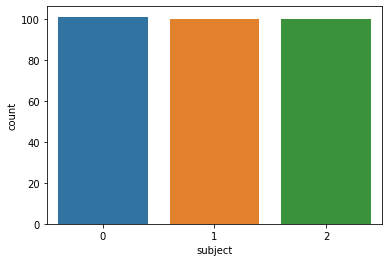

In [ ]:
import seaborn as sns
sns.countplot(x='subject',data=df)
print(df['subject'].value_counts())